## Data Cleaning

In [ ]:
# Missing values:

Missing values occurs when there is no data or values stored for the variable in the observation.

In [ ]:
# Impact of missing values in ML models:

The missing data can cause a bias in the estimation of parameter and the accuracy of ML model will be affected.
# bias - The inability for a ML method(linear regression) to capture the true relationship is bias.
# varience - In ML the difference in fits between datasets is called varience.

In [ ]:
# Types of missing values:

-- Missing completely at random (MCAR) --- The values which are missing without any reason or patterns.
-- Missing at random (MAR) --- The values which have some association with other features of the dataset.
-- Missing not at random (MNAR) --- The values which are missing with some specific reasons.

## ############################################################################

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [12]:
df = pd.read_csv('fifa.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [13]:
df.shape

(18207, 89)

In [14]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [15]:
# Checking for null values in complete rows

df.isnull().all(axis=1).sum()

0

In [16]:
# Finding how many null values in rows...and sorting it

df.isnull().sum(axis=1).sort_values(ascending=False)

13244    75
13267    75
13240    75
13265    75
13264    75
         ..
11377     1
11376     1
11375     1
11374     1
0         1
Length: 18207, dtype: int64

In [17]:
df.iloc[[13244,13267,13240],:]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
13244,13244,239158,R. Minor,30,https://cdn.sofifa.org/players/4/19/239158.png,Denmark,https://cdn.sofifa.org/flags/13.png,62,62,Hobro IK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13267,13267,242491,F. Jaramillo,22,https://cdn.sofifa.org/players/4/19/242491.png,Colombia,https://cdn.sofifa.org/flags/56.png,62,70,Itagüí Leones FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13240,13240,209462,R. Bingham,24,https://cdn.sofifa.org/players/4/19/209462.png,England,https://cdn.sofifa.org/flags/14.png,62,66,Hamilton Academical FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# checking the nan values if the values is more than 50

print('original rows {}'.format(df.shape))
df = df[df.isnull().sum(axis=1)<=50]
print('After removing nan values <=50 {}'.format(df.shape))

original rows (18207, 89)
After removing nan values <=50 (18159, 89)


In [19]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [20]:
# All columns are not visible... so "pd.set_option" is used.

df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1516
Length: 89, dtype: int64

In [24]:
pd.set_option('max_rows',89)
df.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                       0
Real Face                       0
Position                       12
Jersey Number                  12
Joined                       1505
Loaned From                 16895
Contract Valid Until          241
Height                          0
Weight                          0
LS                           2037
ST            

In [30]:
# Finding the mean of nan values for features

(df.isnull().mean()*100).sort_values(ascending=False)

Loaned From                 93.039264
LWB                         11.217578
LM                          11.217578
CB                          11.217578
LCB                         11.217578
LB                          11.217578
RWB                         11.217578
RDM                         11.217578
CDM                         11.217578
LDM                         11.217578
RM                          11.217578
RCM                         11.217578
CM                          11.217578
LCM                         11.217578
RAM                         11.217578
RB                          11.217578
CAM                         11.217578
LAM                         11.217578
RW                          11.217578
RF                          11.217578
CF                          11.217578
LF                          11.217578
LW                          11.217578
RS                          11.217578
ST                          11.217578
LS                          11.217578
RCB         

In [32]:
# Here 'loaned from' feature has 93% missing values so removing it

df.drop('Loaned From',axis=1,inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18159 non-null  int64  
 1   ID                        18159 non-null  int64  
 2   Name                      18159 non-null  object 
 3   Age                       18159 non-null  int64  
 4   Photo                     18159 non-null  object 
 5   Nationality               18159 non-null  object 
 6   Flag                      18159 non-null  object 
 7   Overall                   18159 non-null  int64  
 8   Potential                 18159 non-null  int64  
 9   Club                      17918 non-null  object 
 10  Club Logo                 18159 non-null  object 
 11  Value                     18159 non-null  object 
 12  Wage                      18159 non-null  object 
 13  Special                   18159 non-null  int64  
 14  Prefer

## ############################################################################

In [ ]:
# What is outliers : 

It is the extreme value which is far from the other observations.

# Types of missing vlues:

--univariate outliers --- The points which are beyond the normal values in a single variable.
--bivariate outliers --- The point which lie far from the expected value when two variables are plotted against each other.

In [2]:
df = pd.read_csv('bigmart.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


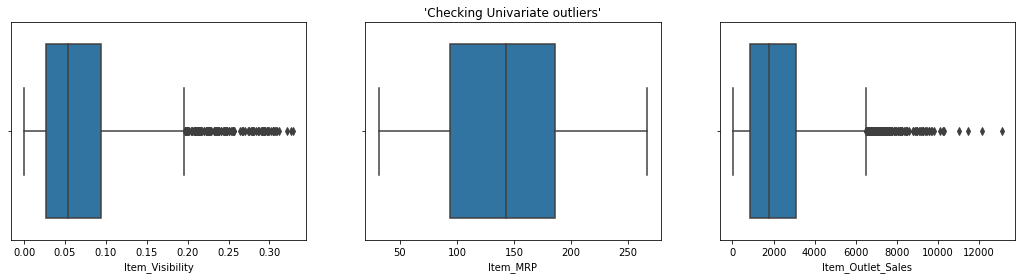

In [83]:
# Univariate outliers

plt.rcParams['figure.figsize'] = (18,4)

plt.subplot(1,3,1)
sns.boxplot(df['Item_Visibility'])

plt.subplot(1,3,2)
sns.boxplot(df['Item_MRP'])
plt.title("'Checking Univariate outliers'")

plt.subplot(1,3,3)
sns.boxplot(df['Item_Outlet_Sales'])

plt.show()

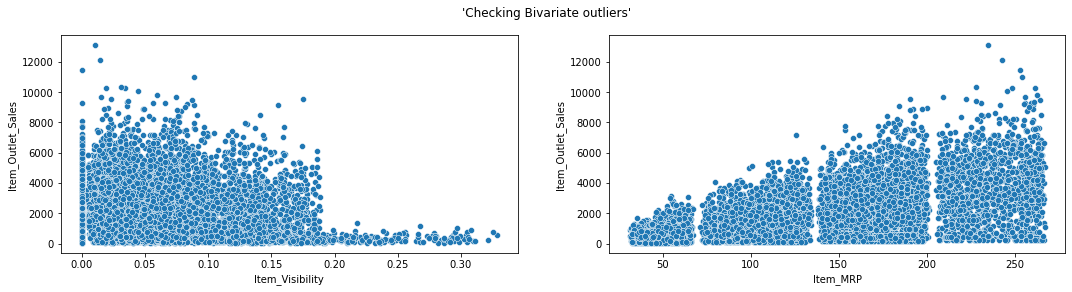

In [84]:
# Bivariate outliers

plt.subplot(1,2,1)
sns.scatterplot(x=df['Item_Visibility'],y=df['Item_Outlet_Sales'])

plt.subplot(1,2,2)
sns.scatterplot(x=df['Item_MRP'],y=df['Item_Outlet_Sales'])
plt.suptitle("'Checking Bivariate outliers'")

plt.show()

In [ ]:
# Handle outliers

--- Can delete the outliers
--- Capping on outliers ---Replacing an outlier to the near value.

In [87]:
# Capping

df['Item_Outlet_Sales'].values[df['Item_Outlet_Sales'].values > 10000]=10000

## ############################################################################

In [91]:
# Data Cleaning on bigmart dataset

In [14]:
df = pd.read_csv('bigmart.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [109]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [16]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])  #categorical variable...so mode is used

In [17]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
df['Item_Fat_Content'].value_counts()  #cleaning categories

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'])

In [20]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
df['Item_Identifier']=df['Item_Identifier'].apply(lambda x:x[0:2])  # 1 st 2 index is mostly common 

In [22]:
df['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [23]:
df.shape

(8523, 12)

<AxesSubplot:xlabel='Item_Visibility'>

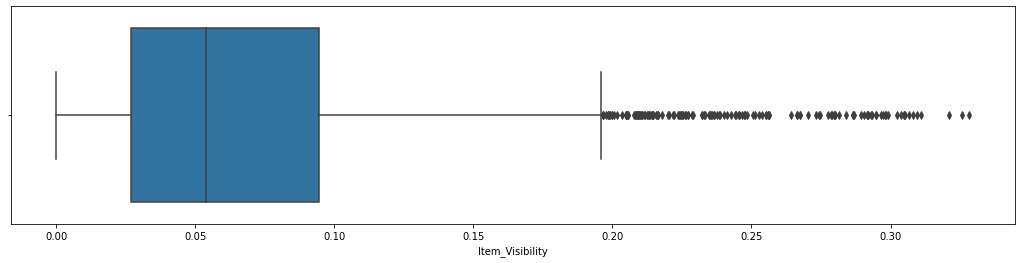

In [126]:
sns.boxplot(df['Item_Visibility'])

In [132]:
df = df[df['Item_Visibility'].values <= 0.2]   #Removing outliers

<AxesSubplot:xlabel='Item_Visibility'>

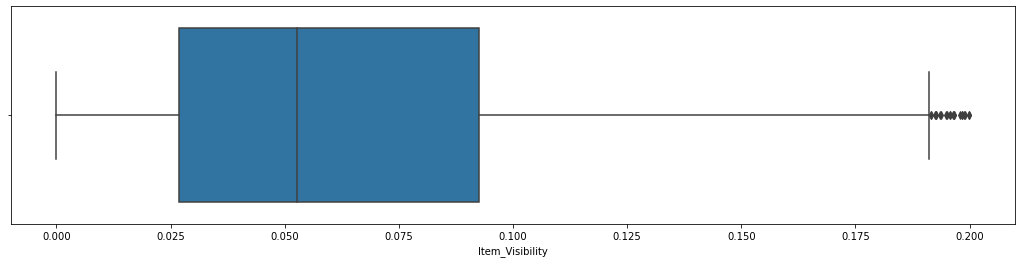

In [134]:
sns.boxplot(df['Item_Visibility'])

In [133]:
df.shape

(8389, 12)

## ############################################################################

In [117]:
movie = pd.read_csv('movies.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [118]:
rating = pd.read_csv('ratings.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [119]:
print('Shape of movie dataset{}'.format(movie.shape))
print('Shape of ratings dataset{}'.format(rating.shape))

Shape of movie dataset(9125, 3)
Shape of ratings dataset(100836, 4)


In [120]:
df = pd.merge(movie,rating,on='movieId',how='inner')   #Combining 2 dataset
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [121]:
df.shape

(96811, 6)

In [122]:
df.drop(['movieId','userId','timestamp'],axis=1,inplace=True) #droping unwanted features

In [123]:
df.head(3)

,title,genres,rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5


In [124]:
# Now grouping the dataset based on the movie name and aggrigated the ratings by their mean

df=pd.pivot_table(df,values='rating',index=['title','genres'],aggfunc='mean')
df.reset_index(inplace=True)

In [125]:
df.shape

(7072, 3)

In [126]:
df.head()

,title,genres,rating
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000
1,'Round Midnight (1986),Drama|Musical,3.500000
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000
3,'Til There Was You (1997),Drama|Romance,4.000000
4,"'burbs, The (1989)",Comedy,3.176471


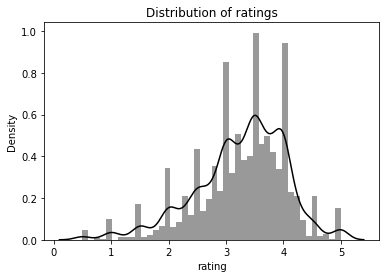

In [127]:
sns.distplot(df['rating'],color='black')
plt.title('Distribution of ratings')
plt.show()

In [128]:
# Separating Title and year

y=df['title'].str.split(' ')  #split is done on title feature
title = y.apply(lambda x:' '.join(x[:-1])) #Except the last index all index are joined
year = y.apply(lambda x:x[-1])  #Last index is selected
year = year.str.strip('(')  #strip is used for removing purpose
year = year.str.strip(')')
df['year'] = year
df['Title'] = title

In [131]:
df.drop('title',axis=1,inplace=True)

In [133]:
df.head()

,genres,rating,year,Title
0,Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004,'Hellboy': The Seeds of Creation
1,Drama|Musical,3.500000,1986,'Round Midnight
2,Drama|Horror|Mystery|Thriller,5.000000,2004,'Salem's Lot
3,Drama|Romance,4.000000,1997,'Til There Was You
4,Comedy,3.176471,1989,"'burbs, The"


## ############################################################################

In [9]:
df = pd.read_csv('melbourne.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [191]:
df.shape

(23547, 21)

In [192]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             5151
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          4481
Bathroom          4484
Car               4626
Landsize          6137
BuildingArea     13529
YearBuilt        12007
CouncilArea       7891
Lattitude         4304
Longtitude        4304
Regionname           1
Propertycount        1
dtype: int64

In [193]:
df.isnull().mean().sort_values(ascending=False)*100

BuildingArea     57.455302
YearBuilt        50.991634
CouncilArea      33.511700
Landsize         26.062768
Price            21.875398
Car              19.645815
Bathroom         19.042766
Bedroom2         19.030025
Longtitude       18.278337
Lattitude        18.278337
Distance          0.004247
Propertycount     0.004247
Postcode          0.004247
Regionname        0.004247
Date              0.000000
SellerG           0.000000
Method            0.000000
Type              0.000000
Rooms             0.000000
Address           0.000000
Suburb            0.000000
dtype: float64

In [194]:
df.drop(['BuildingArea','YearBuilt','CouncilArea'],axis=1,inplace=True)

In [195]:
df[['Landsize','Price','Car','Bathroom','Bedroom2','Longtitude','Lattitude']].describe()

,Landsize,Price,Car,Bathroom,Bedroom2,Longtitude,Lattitude
count,17410.000000,1.839600e+04,18921.000000,19063.000000,19066.000000,19243.000000,19243.000000
mean,551.783458,1.056697e+06,1.626235,1.570897,2.951956,145.000287,-37.812434
std,3544.288014,6.419217e+05,0.974048,0.712684,0.996032,0.106071,0.079926
min,0.000000,8.500000e+04,0.000000,0.000000,0.000000,144.431620,-38.184180
25%,181.000000,6.330000e+05,1.000000,1.000000,2.000000,144.939300,-37.859300
50%,448.000000,8.800000e+05,2.000000,1.000000,3.000000,145.004300,-37.809700
75%,656.000000,1.302000e+06,2.000000,2.000000,4.000000,145.063100,-37.759800
max,433014.000000,9.000000e+06,26.000000,12.000000,30.000000,145.526350,-37.407580


In [196]:
# Filling longitude and latitude with its mean

df['Longtitude'] = df['Longtitude'].fillna(df['Longtitude'].mean())
df['Lattitude'] = df['Lattitude'].fillna(df['Lattitude'].mean())

In [197]:
df.isnull().mean().sort_values(ascending=False)*100

Landsize         26.062768
Price            21.875398
Car              19.645815
Bathroom         19.042766
Bedroom2         19.030025
Propertycount     0.004247
Postcode          0.004247
Regionname        0.004247
Distance          0.004247
Lattitude         0.000000
Date              0.000000
SellerG           0.000000
Method            0.000000
Longtitude        0.000000
Type              0.000000
Rooms             0.000000
Address           0.000000
Suburb            0.000000
dtype: float64

In [198]:
df.dropna(subset=['Landsize','Price','Car','Bathroom','Bedroom2'],inplace=True)

In [199]:
df.isnull().mean().sort_values(ascending=False)*100

Propertycount    0.0
Regionname       0.0
Address          0.0
Rooms            0.0
Type             0.0
Price            0.0
Method           0.0
SellerG          0.0
Date             0.0
Distance         0.0
Postcode         0.0
Bedroom2         0.0
Bathroom         0.0
Car              0.0
Landsize         0.0
Lattitude        0.0
Longtitude       0.0
Suburb           0.0
dtype: float64

## ############################################################################

## Data visualization

In [ ]:
# Data visualization
Graphical representation of information and data

In [ ]:
# Univariate Analysis:

---Univariate analysis helps us to analyse the distribution of the variables present in the data.

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


<AxesSubplot:xlabel='Longtitude', ylabel='Density'>

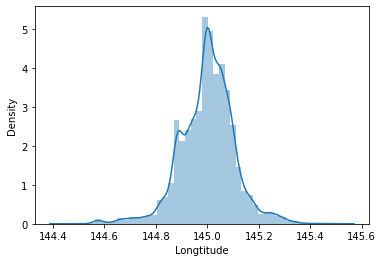

In [5]:
# univariate analysis on numerical data

sns.distplot(df['Longtitude'])

<AxesSubplot:xlabel='Type', ylabel='count'>

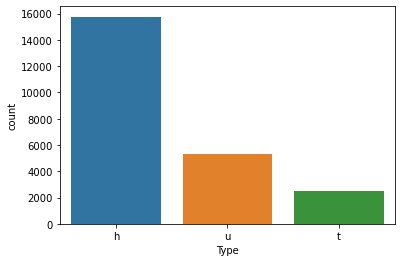

In [6]:
# Univariate analyse on categorical data

sns.countplot(df['Type'])

In [ ]:
# Bivariate analysis

 --- Bivariate analysis is the simultaneous analysis of two variable. It explore the concept of relationship 
    between two variables.

<AxesSubplot:xlabel='Type', ylabel='Propertycount'>

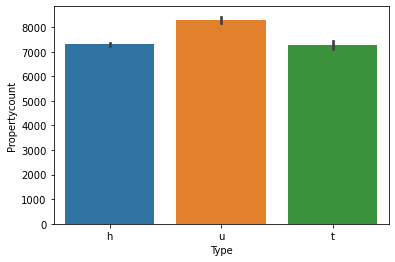

In [7]:
# categorical vs numerical

sns.barplot(df['Type'],df['Propertycount'])

<AxesSubplot:xlabel='Price', ylabel='Propertycount'>

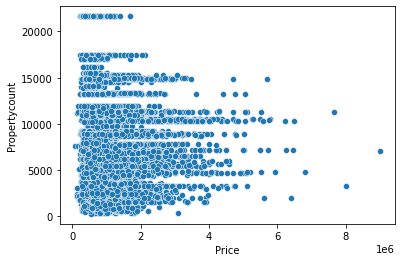

In [9]:
# Continious vs continious

sns.scatterplot(df['Price'],df['Propertycount'])

In [ ]:
# Multivariate analysis

 --- Multivariate data analysis is a set of statistical model that examine patterns in multidimensional data
    by considering at once, several data variables

<AxesSubplot:>

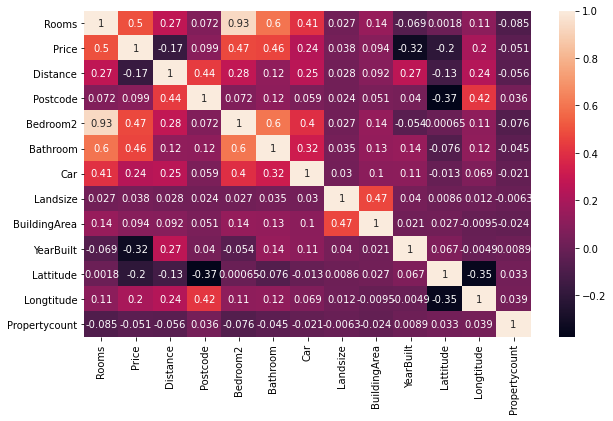

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Type', ylabel='Propertycount'>

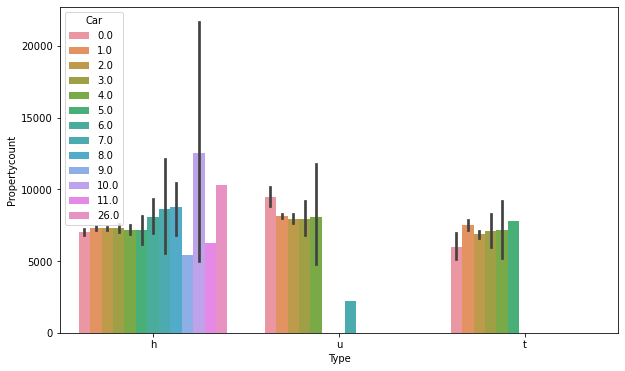

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(df['Type'],df['Propertycount'],df['Car'])

<AxesSubplot:xlabel='Price', ylabel='Propertycount'>

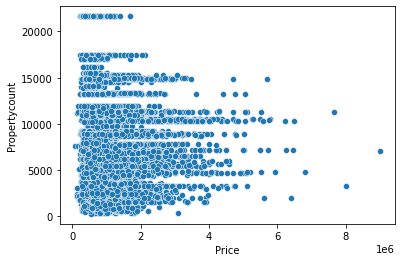

In [4]:
# Scatter plot

sns.scatterplot(df['Price'],df['Propertycount'])

In [14]:
px.scatter(df['Price'],df['Propertycount'],color=df['Type'],marginal_x='box',marginal_y='box')

## ############################################################################

## Feature engineering

In [ ]:
# Steps of feature engineering

--- 1 Removing unnecessary columns from dataset
--- 2 Decomposing date and time features
--- 3 Decomposing categorical features
--- 4 Binning Numerical features (eg- 0 to 10, 10 to 20 ...)
--- 5 Aggrigating features (eg- creating new features)

In [19]:
df['Regionname'].value_counts()

Southern Metropolitan         8772
Northern Metropolitan         6480
Western Metropolitan          4561
Eastern Metropolitan          2640
South-Eastern Metropolitan     857
Eastern Victoria               107
Northern Victoria               78
Western Victoria                51
Name: Regionname, dtype: int64

In [21]:
# 3. Decomposing categorical features

def decomp(x):
    if x=='Southern Metropolitan':
        return 'Southern Metropolitan'
    if x=='Northern Metropolitan':
        return 'Northern Metropolitan'
    else:
        return 'others'
    
    
df['Regionname'].apply(decomp).value_counts()
    

Southern Metropolitan    8772
others                   8295
Northern Metropolitan    6480
Name: Regionname, dtype: int64

## ############################################################################

In [81]:
from textblob import TextBlob

#textblob has a function called sentiment. Which returns two properties polarity and subjectivity

# Text polarity: It is the expressions that determines the sentiment aspects of opinion.(negative,positive,neutral)

In [93]:
# Feature engineering on text data

text = pd.read_csv('amazon_alexa.tsv',delimiter='\t')
text.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [94]:
text.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [95]:
text.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [96]:
text.describe(include='object')

,date,variation,verified_reviews
count,3150,3150,3150
unique,77,16,2301
top,30-Jul-18,Black Dot,
freq,1603,516,79


In [97]:
text['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [98]:
text['length']=text['verified_reviews'].apply(len)
text['word_len']=text['verified_reviews'].apply(lambda x:len(x.split()))
text.head()

,rating,date,variation,verified_reviews,feedback,length,word_len
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,3
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,2
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,38
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,34
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1


In [99]:
# Lets calculate the polarity of the reviews

def get_polarity(text):
    textblob=TextBlob(str(text.encode('utf-8')))
    pol=textblob.sentiment.polarity
    return pol

text['polarity']=text['verified_reviews'].apply(get_polarity)

In [100]:
text.head()

,rating,date,variation,verified_reviews,feedback,length,word_len,polarity
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,3,0.625
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,2,0.875
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,38,-0.100
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,34,0.350
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1,0.000


In [101]:
# Lets calculate the subjectivity of the reviews

def get_subjectivity(text):
    textbot=TextBlob(str(text.encode('utf-8')))
    sub = textbot.sentiment.subjectivity
    return sub

text['subjectivity']=text['verified_reviews'].apply(get_subjectivity)

In [102]:
text.head()

,rating,date,variation,verified_reviews,feedback,length,word_len,polarity,subjectivity
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,3,0.625,0.6000
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,2,0.875,0.8000
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,38,-0.100,0.5125
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,34,0.350,0.4500
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1,0.000,0.0000


## Data Processing

In [ ]:
# Encoding Techniques:

---Encoding data means converting categorical data into numerical data.

Types:
        --Label Encoding
        --Feature Mapping
        --One Hot Encoding
        --Binary Encoding
        --BaseN Encoding
        --Target Encoding


In [24]:
df = df[['Item_Fat_Content','Item_Type']]

In [25]:
# Label Encoding  -  Each category is assigned a value 1 through N

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [26]:
df['E_Item_Fat_Content'] = lb.fit_transform(df['Item_Fat_Content'])

In [27]:
df.head()

,Item_Fat_Content,Item_Type,E_Item_Fat_Content
0,Low Fat,Dairy,0
1,Regular,Soft Drinks,1
2,Low Fat,Meat,0
3,Regular,Fruits and Vegetables,1
4,Low Fat,Household,0


In [29]:
# Feature Mapping  -  A feature mapping is a function which maps a data vector to a feature space. 

df['F_Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat','Regular'],[0,1])

In [32]:
df.head()

,Item_Fat_Content,Item_Type,E_Item_Fat_Content,F_Item_Fat_Content
0,Low Fat,Dairy,0,0
1,Regular,Soft Drinks,1,1
2,Low Fat,Meat,0,0
3,Regular,Fruits and Vegetables,1,1
4,Low Fat,Household,0,0


In [36]:
# One hot encoding -- We map each category to a vector that contains 1 or 0.

x=pd.get_dummies(df['Item_Fat_Content'])
x.head()

,Low Fat,Regular
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [38]:
df = pd.concat([df,x],axis=1)
df.head()

,Item_Fat_Content,Item_Type,E_Item_Fat_Content,F_Item_Fat_Content,Low Fat,Regular
0,Low Fat,Dairy,0,0,1,0
1,Regular,Soft Drinks,1,1,0,1
2,Low Fat,Meat,0,0,1,0
3,Regular,Fruits and Vegetables,1,1,0,1
4,Low Fat,Household,0,0,1,0


In [40]:
# Binary encoding -- It converts a category into binary digits. Each binary digit creates one feature column. 
  #Binary encoding creates fewer columns than one-hot encoding.
from category_encoders import BinaryEncoder

In [42]:
bi = BinaryEncoder()
x = bi.fit_transform(df['Item_Fat_Content'])

In [44]:
x.head()

,Item_Fat_Content_0,Item_Fat_Content_1
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [45]:
df = pd.concat([df,x],axis=1)
df.head()

,Item_Fat_Content,Item_Type,E_Item_Fat_Content,F_Item_Fat_Content,Low Fat,Regular,Item_Fat_Content_0,Item_Fat_Content_1
0,Low Fat,Dairy,0,0,1,0,0,1
1,Regular,Soft Drinks,1,1,0,1,1,0
2,Low Fat,Meat,0,0,1,0,0,1
3,Regular,Fruits and Vegetables,1,1,0,1,1,0
4,Low Fat,Household,0,0,1,0,0,1


In [47]:
# BaseN encoder
from category_encoders import BaseNEncoder

In [48]:
bn = BaseNEncoder(base=4)
x=bn.fit_transform(df['Item_Type'])
x.head()

,Item_Type_0,Item_Type_1,Item_Type_2
0,0,0,1
1,0,0,2
2,0,0,3
3,0,1,0
4,0,1,1


## ############################################################################

# Gausian Transformation

In [ ]:
# It is a type of continious probability distribution... mean,median,mode will be same---68% in 1st SD---95% in 2nd SD--99.7% in 3rd SD

In [51]:
df=pd.read_csv('bigmart.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [67]:
import scipy.stats as stat

In [65]:
def plot(df,variable):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.distplot(df[variable])
    plt.subplot(1,2,2)
    stat.probplot(df[variable],plot=plt)

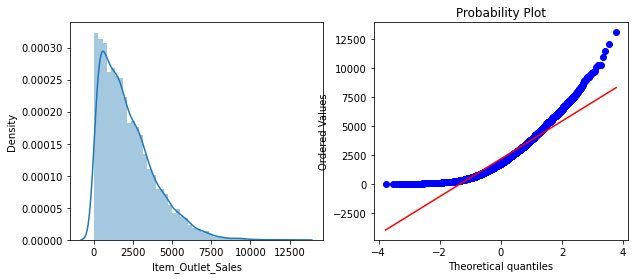

In [66]:
plot(df,'Item_Outlet_Sales')

In [68]:
# Squareroot and cuberoot transformation

df['sq']=np.sqrt(df['Item_Outlet_Sales'])

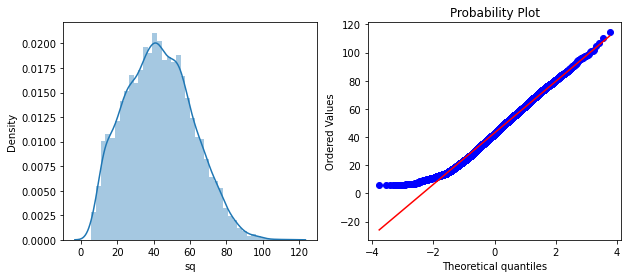

In [69]:
plot(df,'sq')

In [70]:
df['cu']=np.cbrt(df['Item_Outlet_Sales'])

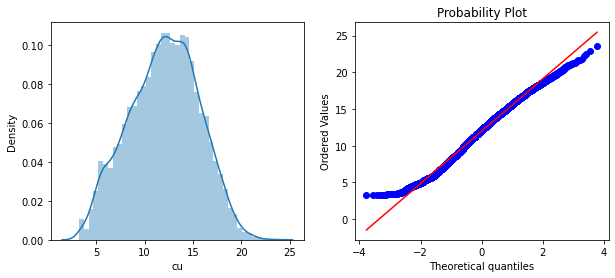

In [71]:
plot(df,'cu')

In [72]:
# Log and Log1p Tranformation

df['log']=np.log(df['Item_Outlet_Sales'])
df['log1p']=np.log1p(df['Item_Outlet_Sales'])

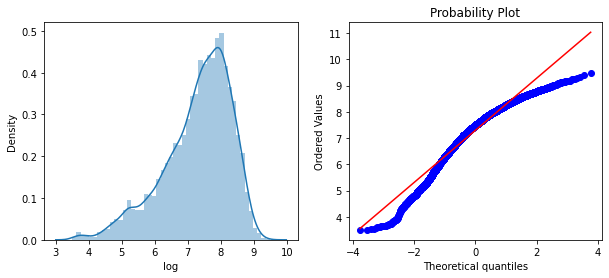

In [73]:
plot(df,'log')

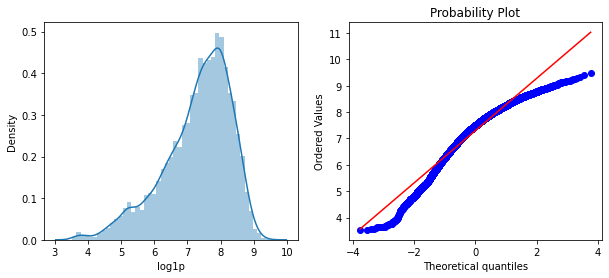

In [74]:
plot(df,'log1p')

In [ ]:
# Box Cox transfermation -- it is a way to transform non-normal dependent variable into normal shape

If skewness is less than -1 and greater than +1. then it is highly skewd.

In [76]:
df.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
sq                           0.234676
cu                          -0.102507
log                         -0.887753
log1p                       -0.882266
dtype: float64

In [78]:
df['bc'],param=stat.boxcox(df['Item_Outlet_Sales'])

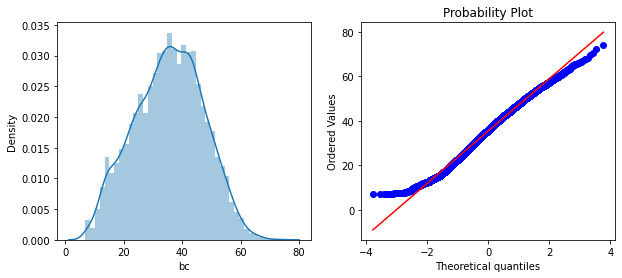

In [79]:
plot(df,'bc')

In [80]:
df.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
sq                           0.234676
cu                          -0.102507
log                         -0.887753
log1p                       -0.882266
bc                          -0.074978
dtype: float64